#**Machine Learning**



## Part 1: Clustering 

Let's assume you want to design an environment to predict a class/category from a dataset based on specific features of that class. However, all the features are not strong enough or in other words features not that much variance/uniqueness across the classes. So, you have to design a clustering model by answering the following questions:

1. Download the attached clustering.csv file. Read the file and separate the class and feature matrix.

In [ ]:
import pandas as pd, numpy as np
import seaborn as sns, matplotlib.pyplot as plt
# INSERT your code (or comment) here
dataset= pd.read_csv("E://PC Backup/Others/fiverr/20200902 python tuition/clustering.csv")

feature_martix= dataset.drop(columns=['Class'])
Class= dataset[['Class']]
seed=1234

2. Determine the number of clusters from the dataset. Is this same as the actual number of classes in the dataset? 

<!-- Choose the best three features using different selection criteria (ANOVA, Chi-squared) based on the purity score for the k-mean cluster (Euclidean distance matrix). Which one is good and why? __(5 marks)__ -->

Class
0    70
1    70
2    70
dtype: int64

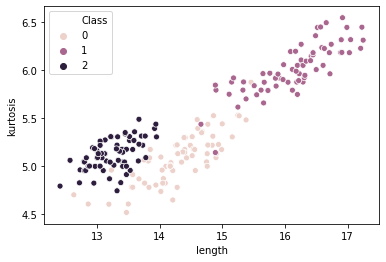

In [ ]:
# INSERT your code (or comment) here
sns.scatterplot(data= dataset,x= 'length', y= 'kurtosis' , hue='Class')
dataset.groupby('Class').size()
# the dataset has three classes with 70 observations per class
#The dataset also has three possible clusters visually when seen across length and kurtosis


3. Perform K-Means clustering on the complete dataset and report purity score. 

In [ ]:
# INSERT your code (or comment) here
from sklearn.cluster import KMeans
n_clusters= 3
X= feature_martix
model = KMeans(n_clusters=n_clusters)
# fit the model
model.fit(X)

# assign a cluster to each example
y_pred = model.predict(X)




In [ ]:
#calculating purity score
import numpy as np
from sklearn import metrics

y_pred= y_pred 
y_true= Class.values
def purity_score(y_true, y_pred):
    # compute contingency matrix (also called confusion matrix)
    contingency_matrix = metrics.cluster.contingency_matrix(y_true, y_pred)
    contingency_matrix= pd.crosstab(y_true.T[0], y_pred)
    # return purity
    return np.sum(np.amax(contingency_matrix, axis=0)) / np.sum(np.sum(contingency_matrix))
#calculating purity score
purity_score(y_true, y_pred)


0.8952380952380953

4. There are several distance metrics for  K-Means such as euclidean, squared euclidean, Manhattan, Chebyshev, Minkowski. [ __Hints:__ See the pyclustering library for python.]
    - Your job is to compare the purity score of k-means clustering for different distance metrics. 
    - Select the best distance metric and explain why this distance metric is best for the given dataset. 

In [ ]:
# INSERT your code (or comment) here
#! pip3 install pyclustering
#import libraries
from pyclustering.cluster.center_initializer import kmeans_plusplus_initializer
from pyclustering.cluster.kmeans import kmeans
from pyclustering.utils.metric import distance_metric, type_metric

In [ ]:
#clustering function
def kmeans_clustering(metric):
    metric = metric
    # run cluster analysis and obtain results
    initial_centres=X.values[[0,2,3],:]
    #define clustering model
    kmeans_instance = kmeans(X.values,initial_centers=initial_centres, metric=metric)
    #process clustering
    kmeans_instance.process()
    # get clusters
    clusters = kmeans_instance.get_clusters()
    centers = kmeans_instance.get_centers()
    ####
    yhat= Class.copy()
    yhat.loc[clusters[0],'Pred']= 0
    yhat.loc[clusters[1],'Pred']= 1
    yhat.loc[clusters[2],'Pred']= 2
    clustering_result= yhat
    return clustering_result

#function to calculate purity 


def purity_score(y_true, y_pred):
    # compute contingency matrix (also called confusion matrix)
    contingency_matrix= pd.crosstab(y_true, y_pred)
    # return purity
    return np.sum(np.amax(contingency_matrix, axis=0)) / np.sum(np.sum(contingency_matrix))

  

#### Manhattan Distance

In [ ]:
metric= distance_metric(type_metric.MANHATTAN)
clustering_result= kmeans_clustering(metric)

y_true= clustering_result.Class
y_pred= clustering_result.Pred

purity_score(y_true, y_pred)

0.8904761904761904

#### Chebychev Dostance

In [ ]:
metric= distance_metric(type_metric.CHEBYSHEV)
clustering_result= kmeans_clustering(metric)

y_true= clustering_result.Class
y_pred= clustering_result.Pred

purity_score(y_true, y_pred)

0.8761904761904762

#### Euclidean Distance

In [ ]:
metric= distance_metric(type_metric.EUCLIDEAN)
clustering_result= kmeans_clustering(metric)

y_true= clustering_result.Class
y_pred= clustering_result.Pred

purity_score(y_true, y_pred)

0.8952380952380953

#### Squared Euclidean Distance

In [ ]:
metric= distance_metric(type_metric.EUCLIDEAN_SQUARE)
clustering_result= kmeans_clustering(metric)

y_true= clustering_result.Class
y_pred= clustering_result.Pred

purity_score(y_true, y_pred)

0.8952380952380953

#### Monkowski Distance

In [ ]:
metric= distance_metric(type_metric.MINKOWSKI, degree= 3)

clustering_result= kmeans_clustering(metric)

y_true= clustering_result.Class
y_pred= clustering_result.Pred

purity_score(y_true, y_pred)

0.5476190476190477

#### Inference:
- Euclidean distance is best as this gives the highest purity


5. Use selection criteria (ANOVA, Chi-squared) to select best three features and use them for K-Means clustering. Based on the purity score which feature set are you going to recommend and why?

In [ ]:
# INSERT your code (or comment) here
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
# define feature selection
fs = SelectKBest(score_func=f_classif, k=3)
# apply feature selection
y= Class.values.ravel()
X= feature_martix
X_selected = fs.fit_transform(X, y)




In [ ]:
#here using X_selected in place of X
X= X_selected
n_clusters= 3
model = KMeans(n_clusters=n_clusters)
# fit the model
model.fit(X)

# assign a cluster to each example
y_pred = model.predict(X)


In [ ]:
#calculating purity score
import numpy as np
from sklearn import metrics

y_pred= y_pred 
y_true= Class.values
def purity_score(y_true, y_pred):
    # compute contingency matrix (also called confusion matrix)
    #contingency_matrix = metrics.cluster.contingency_matrix(y_true, y_pred)
    contingency_matrix= pd.crosstab(y_true.T[0], y_pred)
    # return purity
    return np.sum(np.amax(contingency_matrix, axis=0)) / np.sum(np.sum(contingency_matrix))
purity_score(y_true, y_pred)

0.8428571428571429

#### Inference
- Based on top 3 features, purity has reduced
- Hence complete feature set is better than top 3 features

# Part-2 (Dimensionality Reduction using PCA/SVD) 

1. For the dataset (clustering.csv), perform PCA.
    - plot the captured variance with respect to increasing latent dimensionality.
  
  What is the minimum dimension that captures:
    - at least 89% variance? 
    - at least 99% variance? 

In [ ]:
# standardizing the features
from sklearn.preprocessing import StandardScaler
X_scaled = StandardScaler().fit_transform(feature_martix)


,n_components,explained_variance_ratio
0,1,0.718743
1,2,0.889825
2,3,0.986682
3,4,0.996449
4,5,0.999122


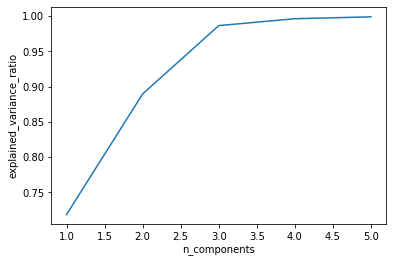

In [ ]:
# INSERT your code (or comment) here
from sklearn.decomposition import PCA
pca = PCA(n_components=5)
X= pd.DataFrame(X_scaled, columns= feature_martix.columns)
principalComponents_data = pca.fit_transform(X)
principalComponents_data.shape

captured_variance= pd.Series(dtype= 'object')

#calculating cumulative variance
for i in range(0,5):
    captured_variance[str(i)]= np.sum(a[0:i+1,])

explained_variance_vs_components= pd.DataFrame({'n_components':range(1,6), 'explained_variance_ratio': captured_variance})
sns.lineplot(x=explained_variance_vs_components.n_components, y= explained_variance_vs_components.explained_variance_ratio)
explained_variance_vs_components


Inference: 89% of the variance is explained by 3 components, 99% by 4 components

2. Determine the purity of clusters formed by the number of principal components which captured 89% and 99% variances respectively. Plot a line graph of the purity scores against the captured variances. Discuss your findings. __(7 marks)__

In [ ]:
# INSERT your code (or comment) here
def cluster_and_purity_score(X):
    # INSERT your code (or comment) here
    from sklearn.cluster import KMeans
    n_clusters= 3
    model = KMeans(n_clusters=n_clusters, random_state= seed)
    # fit the model
    model.fit(X)

    # assign a cluster to each example
    y_pred = model.predict(X)
    
    
    #calculating purity score
    import numpy as np
    from sklearn import metrics

    y_pred= y_pred 
    y_true= Class.values
    score= purity_score(y_true, y_pred)
    return score

    


In [ ]:
#considering 3 components (more than 89% variance explained)

X= principalComponents_data[:,0:3]

cluster_and_purity_score(X)

0.9238095238095239

In [ ]:
#considering 4 components (more than 99% variance explained)

X= principalComponents_data[:,0:4]

cluster_and_purity_score(X)

0.919047619047619

In [ ]:
component_vs_purity_score_data= pd.DataFrame(columns=['n_components','purity_score'])
for i in range(1,6):
    X= principalComponents_data[:,0:i]
    component_vs_purity_score_data.loc[i-1,['n_components','purity_score']]= i, cluster_and_purity_score(X)
    
component_vs_purity_score_data[['n_components']] = component_vs_purity_score_data[['n_components']].astype('int32')
component_vs_purity_score_data[['purity_score']] = component_vs_purity_score_data[['purity_score']].astype('float64')


component_vs_purity_score_data

,n_components,purity_score
0,1,0.857143
1,2,0.923810
2,3,0.923810
3,4,0.919048
4,5,0.919048


#### Analysing purity score with captured variance

,n_components,purity_score,explained_variance_ratio
0,1,0.857143,0.718743
1,2,0.923810,0.889825
2,3,0.923810,0.986682
3,4,0.919048,0.996449
4,5,0.919048,0.999122


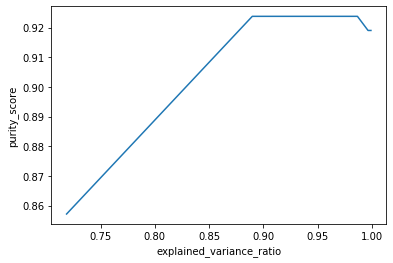

In [ ]:
# merging both the data
purity_score_vs_captured_variance= pd.merge(component_vs_purity_score_data, explained_variance_vs_components, on= 'n_components')
sns.lineplot(data= purity_score_vs_captured_variance, x='explained_variance_ratio', y= 'purity_score')
purity_score_vs_captured_variance

#### Inference:
- For increase in explained variance, purity score increases until it reaches a point reaches a maximum 
- A fall in purity score is observed when explained variance is too high(corresponding to 5 components)
- It means too many clusters are also not optimal

3. Let's assume you have two datasets one is linear and another is curved structural data.
    - Can we apply PCA on these datasets? Justify your answer. 

In [ ]:
- PCA can be applied on the linear dataset. 
- PCA ideally should not be applied on curved structural dataset. The results will not be of any use.
- It is because PCA mere performs rotation of axis to capture most of the variance in the data using as fewer dimensions as possible.
- When the data is curved structural, we are not being able to solve our purpose of reducing the number of dimensions using PCA
- In such a dataset, a non linear PCA should be used. Example of one such algorithm is t-sne 
